In [83]:
### 라이브러리 선언

#데이터 처리 라이브러리
import pandas as pd
#숫자 계산 라이브러리
import numpy as np

In [84]:
# 머신러닝 라이브러리 tree(decision tree, ensemble randomforest...10개)
from sklearn import tree,ensemble

In [85]:
# 머신러닝 라이브러리 svm(support vector machine, neighbors :knn)
from sklearn import svm, neighbors

In [86]:
# 머신러닝 시각화
import seaborn as sns

In [87]:
# 데이터를 탐색하다 EDA Explore Data Analysis

In [88]:
csData = pd.read_csv("../dataset/customer.csv")

In [89]:
csData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   balance  20000 non-null  int64 
 1   stock    20000 non-null  int64 
 2   label    20000 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB


In [90]:
csData.label.drop_duplicates()

0     normal
1    diamond
4        vip
Name: label, dtype: object

정답지별로 데이터가 50건 이상인지 확인!

<AxesSubplot:xlabel='label', ylabel='count'>

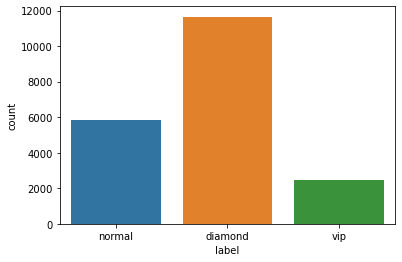

In [91]:
sns.countplot(data=csData, x="label")

### 1. 타입통합/숫자형 컬럼 변경

In [92]:
### 1. 타입통합 스킵!

In [93]:
### 숫자형 컬럼 변경 스킵!

In [94]:
# scaling  데이터의 높이를 동일하게 맞추자 

In [95]:
inData

NameError: name 'inData' is not defined

In [122]:
maxStockValue = csData.stock.max()
maxStockValue

80000000

In [124]:
csData["STOCK_SCALE"] = csData.stock / maxStockValue

In [125]:
csData

,balance,stock,label,Label_MAP,STOCK_SCALE
0,30000000,22500000,normal,1,0.281250
1,280000000,48000000,diamond,2,0.600000
2,300000000,40666666,diamond,2,0.508333
3,54000000,28000000,normal,1,0.350000
4,768000000,32000000,vip,3,0.400000
...,...,...,...,...,...
19995,628000000,44666666,diamond,2,0.558333
19996,276000000,20000000,normal,1,0.250000
19997,652000000,41333333,diamond,2,0.516667
19998,676000000,45333333,diamond,2,0.566667


### 2. 특성 선정/ 데이터 불러오기

In [126]:
###특성선정

In [127]:
csTypeMap = {"normal":1,"diamond":2,"vip":3}

In [128]:
csData["Label_MAP"] = csData.label.map(csTypeMap)

In [129]:
corrDf = csData.corr()

In [130]:
STDCORR = 0.5

In [131]:
features = list(corrDf.loc[(abs(corrDf["Label_MAP"]) > STDCORR) & (abs(corrDf["Label_MAP"]) != 1)].index)

In [132]:
features

['balance', 'stock', 'STOCK_SCALE']

In [133]:
label = ["label"]

In [134]:
### 데이터 분리

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
trainingDataFeatures,\
testDataFeatures,\
trainingDataLabel,\
testDataLabel = train_test_split( csData.loc[:,features],
                 csData.loc[:,label], 
                 test_size=0.3, random_state=5)

In [137]:
print( trainingDataFeatures.shape )
print( testDataFeatures.shape )
print( trainingDataLabel.shape )
print( testDataLabel.shape )

(14000, 3)
(6000, 3)
(14000, 1)
(6000, 1)


### 3. 모델 선언/학습

In [138]:
svmModel = svm.SVR( C=1 )
treeModel = tree.DecisionTreeClassifier( random_state=10 )
rfModel = ensemble.RandomForestClassifier( random_state=5 )
knnModel = neighbors.KNeighborsClassifier(n_neighbors=3)

In [139]:
# x= 훈련 y=정답
svmModelFit = svmModel.fit(X=trainingDataFeatures, y=trainingDataLabel)
treeModelFit = treeModel.fit(X=trainingDataFeatures, y=trainingDataLabel)
rfModelFit = rfModel.fit(X=trainingDataFeatures, y=trainingDataLabel)
knnModelFit  = knnModel.fit(X=trainingDataFeatures, y=trainingDataLabel)

C:\Users\SMART27\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: could not convert string to float: 'vip'

### 4. 예측 

In [140]:
svmPredict = svmModelFit.predict(trainingDataFeatures)
dtPredict = treeModelFit.predict(trainingDataFeatures)
rfPredict = rfModelFit.predict(trainingDataFeatures)
knnPredict = knnModelFit.predict(trainingDataFeatures)

NameError: name 'svmModelFit' is not defined

### 5. 데이터정리

In [141]:
testDataLabel["SVM_PREDICT"] = svmPredict
testDataLabel["DT_PREDICT"] = dtPredict
testDataLabel["RF_PREDICT"] = rfPredict
testDataLabel["KNN_PREDICT"] = knnPredict

NameError: name 'svmPredict' is not defined

In [142]:
testData.to_csv("../categoryresult.csv")

NameError: name 'testData' is not defined

In [115]:
from sklearn.metrics import classification_report

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
svmAccuracy = accuracy_score(y_true = testDataLabel.label,
                     y_pred = testDataLabel.SVM_PREDICT)
dtAccuracy = accuracy_score(y_true = testDataLabel.label,
                     y_pred = testDataLabel.SVM_PREDICT)
rfAccuracy = accuracy_score(y_true = testDataLabel.label,
                     y_pred = testDataLabel.SVM_PREDICT)
knnAccuracy = accuracy_score(y_true = testDataLabel.label,
                     y_pred = testDataLabel.SVM_PREDICT)

AttributeError: 'DataFrame' object has no attribute 'SVM_PREDICT'

In [118]:
pd.DataFrame( [[svmAccuracy, dtAccuracy, rfAccuracy, knnAccuracy]], columns = ["SVM", "DT", "RF", "KNN"] )

NameError: name 'svmAccuracy' is not defined

In [119]:
print( classfication_report(y_true = testDataLabel.label,
                     y_pred = testDataLabel.SVM_PREDICT) )

NameError: name 'classfication_report' is not defined

In [120]:
###테스트해보기

In [121]:
features

['balance', 'stock']

In [ ]:
inBalance = 3000000
inStock = 30000000
testData = pd.DataFrame( [[inBalance, inBalance]] )

In [ ]:
dtModelFit.predict(testData)

In [1]:
import pandas as pd

### 1.타입통합 및 숫자형컬럼 추가

In [22]:
### 스킵

### 2. 모델

In [68]:
from sklearn.cluster import KMeans

In [69]:
stData = pd.read_csv("../dataset/student_middle.csv")

In [70]:
kmeanModel = KMeans(random_state=11, n_clusters=2)

In [71]:
features=["SW","DB","AND"]

In [72]:
stDataTarget = stData.loc[:,features]

### 자율학습 예측

In [73]:
kmeanModelFit = kmeanModel.fit(stDataTarget)

In [74]:
kmeanModelFit

KMeans(n_clusters=2, random_state=11)

In [75]:
kmeanModelFit.predict(stDataTarget)

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [76]:
predictCluster = kmeanModel.fit_predict(stDataTarget)

In [77]:
stData["CLUSTER"] = predictCluster

In [78]:
import seaborn as sns

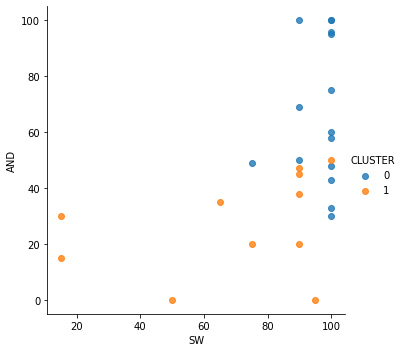

In [79]:
sns.lmplot(data=stData, x="SW", y="AND", hue="CLUSTER",fit_reg=False)

In [37]:
stData

,NAME,SW,DB,AND,CLUSTER
0,ST0001,95,30,0,1
1,ST0002,50,50,0,1
2,ST0003,15,30,15,1
3,ST0004,90,50,20,1
4,ST0005,75,20,20,1
5,ST0006,100,80,30,0
6,ST0007,15,10,30,1
7,ST0008,100,100,33,0
8,ST0009,65,60,35,1
9,ST0010,90,20,38,1


In [36]:
predictCluster

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0])